In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from pydataset import data
import prepare
import acquire
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = acquire.new_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [4]:
train, validate, test = prepare.prep_titanic_data(df)

In [5]:

train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [6]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [7]:
train = train.drop(columns=['sex', 'embark_town'])

In [8]:
validate = validate.drop(columns=['sex', 'embark_town'])

In [9]:
test = test.drop(columns=['sex', 'embark_town'])

In [10]:
X_train = train.drop(columns='survived')
y_train = train['survived']

X_validate = validate.drop(columns='survived')
y_validate = validate['survived']

X_test = test.drop(columns='survived')
y_test = test['survived']

In [56]:
def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [57]:
establish_baseline(y_train)

0.6164658634538153

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_train, y_train)

0.7951807228915663

In [16]:
knn.score(X_validate, y_validate)

0.7149532710280374

Evaluate your results using the model score, confusion matrix, and classification report.

In [17]:
acc = knn.score(X_train, y_train)
acc

0.7951807228915663

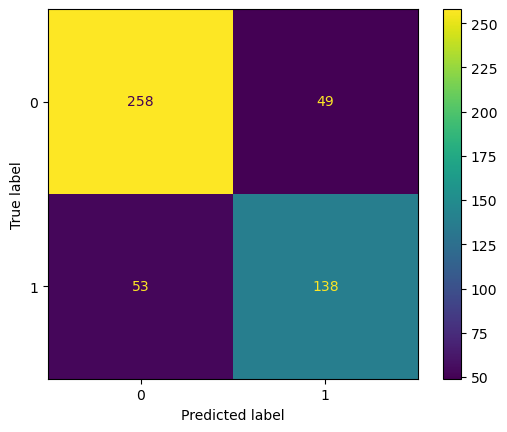

In [19]:
plot_confusion_matrix(knn, X_train, y_train)

In [20]:
y_predictions = knn.predict(X_train)

In [22]:
print("Classification Report")
pd.DataFrame(classification_report(y_train, y_predictions, output_dict=True))

Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.829582,0.737968,0.795181,0.783775,0.794445
recall,0.840391,0.722513,0.795181,0.781452,0.795181
f1-score,0.834951,0.730159,0.795181,0.782555,0.794760
support,307.000000,191.000000,0.795181,498.000000,498.000000


Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [23]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(258, 49, 53, 138)

In [24]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [25]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {acc}", '\n')
print(f"True Positive Rate/Recall: {TPR}", '\n')
print(f"False Positive Rate: {FPR}", '\n')
print(f"True Negative Rate: {TNR}", '\n')
print(f"False Negative Rate: {FNR}", '\n')
print(f"Precision: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7951807228915663 

True Positive Rate/Recall: 0.7225130890052356 

False Positive Rate: 0.15960912052117263 

True Negative Rate: 0.8403908794788274 

False Negative Rate: 0.2774869109947644 

Precision: 0.7379679144385026 

F1 Score: 0.73015873015873 

Support (0): 307 

Support (1): 191


Run through steps 1-3 setting k to 10

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [28]:
knn.score(X_train, y_train)

0.7449799196787149

In [29]:
knn.score(X_validate, y_validate)

0.7242990654205608

In [30]:
acc = knn.score(X_train, y_train)
acc

0.7449799196787149

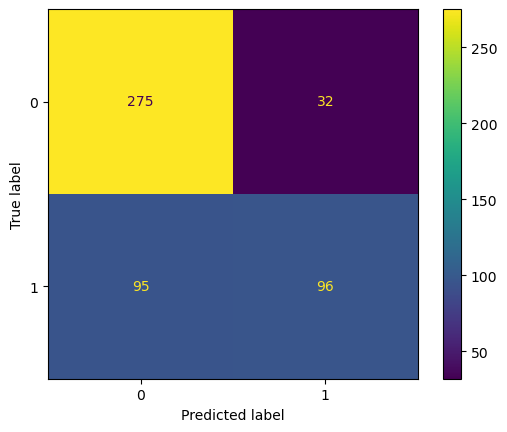

In [31]:
plot_confusion_matrix(knn, X_train, y_train)

In [32]:
y_predictions = knn.predict(X_train)

In [33]:
print("Classification Report")
pd.DataFrame(classification_report(y_train, y_predictions, output_dict=True))

Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.743243,0.750000,0.74498,0.746622,0.745835
recall,0.895765,0.502618,0.74498,0.699192,0.744980
f1-score,0.812408,0.601881,0.74498,0.707144,0.731663
support,307.000000,191.000000,0.74498,498.000000,498.000000


In [34]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP 

(275, 32, 95, 96)

In [35]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [36]:
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {acc}", '\n')
print(f"True Positive Rate/Recall: {TPR}", '\n')
print(f"False Positive Rate: {FPR}", '\n')
print(f"True Negative Rate: {TNR}", '\n')
print(f"False Negative Rate: {FNR}", '\n')
print(f"Precision: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7449799196787149 

True Positive Rate/Recall: 0.5026178010471204 

False Positive Rate: 0.10423452768729642 

True Negative Rate: 0.8957654723127035 

False Negative Rate: 0.4973821989528796 

Precision: 0.75 

F1 Score: 0.6018808777429466 

Support (0): 307 

Support (1): 191


Run through steps 1-3 setting k to 20

In [37]:
knn = KNeighborsClassifier(n_neighbors=20)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [39]:
knn.score(X_train, y_train)

0.7188755020080321

In [40]:
knn.score(X_validate, y_validate)

0.7149532710280374

In [41]:
acc = knn.score(X_train, y_train)
acc

0.7188755020080321

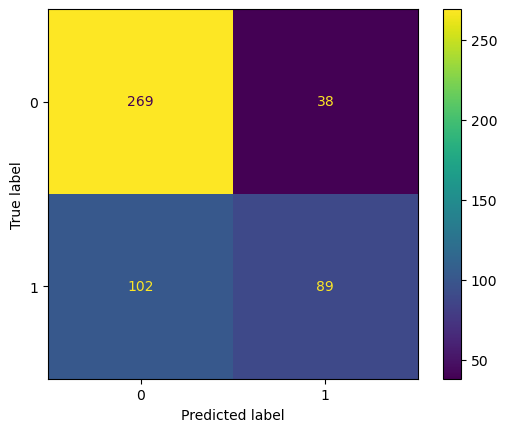

In [42]:
plot_confusion_matrix(knn, X_train, y_train)

In [43]:
y_predictions = knn.predict(X_train)

In [44]:
print("Classification Report")
pd.DataFrame(classification_report(y_train, y_predictions, output_dict=True))

Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.725067,0.700787,0.718876,0.712927,0.715755
recall,0.876221,0.465969,0.718876,0.671095,0.718876
f1-score,0.793510,0.559748,0.718876,0.676629,0.703855
support,307.000000,191.000000,0.718876,498.000000,498.000000


In [45]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(269, 38, 102, 89)

In [46]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [47]:
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {acc}", '\n')
print(f"True Positive Rate/Recall: {TPR}", '\n')
print(f"False Positive Rate: {FPR}", '\n')
print(f"True Negative Rate: {TNR}", '\n')
print(f"False Negative Rate: {FNR}", '\n')
print(f"Precision: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7188755020080321 

True Positive Rate/Recall: 0.46596858638743455 

False Positive Rate: 0.1237785016286645 

True Negative Rate: 0.8762214983713354 

False Negative Rate: 0.5340314136125655 

Precision: 0.7007874015748031 

F1 Score: 0.559748427672956 

Support (0): 307 

Support (1): 191


What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
metrics = []

for k in range(1,20):
    knn, y_train_pred, y_val_pred = knn_fit_predict(k, X_train, 
                                                    y_train, 
                                                    X_validate)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    
    output = {
            "k": k,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
    }

    metrics.append(output)
    
eval_df = pd.DataFrame(metrics)
eval_df['difference'] = eval_df['train_accuracy'] - eval_df['validate_accuracy']

eval_df

In [50]:
plt.figure(figsize=(16,9))
plt.plot(eval_df.k, eval_df.train_accuracy, label='Train Accuracy')
plt.plot(eval_df.k, eval_df.validate_accuracy, label='Validate Accuracy')
plt.plot(eval_df.k, eval_df.difference, label='Accuracy Difference')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

,neighbors,train_acc,val_acc
0,1,0.995984,0.700935
1,3,0.839357,0.742991
2,5,0.795181,0.714953
3,7,0.763052,0.705607
4,9,0.763052,0.696262


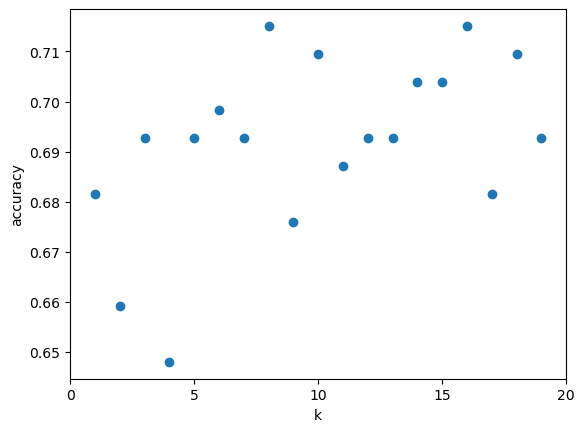

In [55]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

Which model performs best on our out-of-sample data from validate?